# Univariate vs Multivariate Models to Predict Covid Deceases

#### The main purpose of this study is try to find a model that help us to identify the variables driving the covid deaths 

##### Take aways

* Oppossed as initially thought, the initial theory that Covid deaths are strongly correlated to the wealthness of a country is not conclussive. The correlation coefficient (R2) between GDP per Capita and Covid deaths per million is only  9.44%. This means that approximate only 9.44% of the variance of the Covid deaths is explained by the variance of the GDP per Capita.

* When we move to a multivariate arena, we start by creating a model using 8 variables that we thing could explain the Covid deaths. This multivariate model have a predictive power of 53.8% and according to the F-statistic the overall model has statistical significance. Not all the variable coefficients have statistical significance.

* After several trials and eliminating those variables that does not have statistical significance, we reduce the model to a bivariate model based on cardiovascular death rate and human development index. This model has a correlation coefficient of 50.3% and the two variables have statistical significance.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Setting route of file from https://ourworldindata.org/coronavirus-source-data
file_to_load = "Resources/owid-covid-data.csv"
# Reading File and store into Pandas data frame
covid_df = pd.read_csv(file_to_load, encoding="ISO-8859-1")
print(covid_df.shape)
covid_df.head(3)

(52222, 41)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
#To visualize all the columns available
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [4]:
#Setting the cut off date of the study as of September 30th 
RegressCovid = covid_df.loc[(covid_df["date"]=="2020-09-30")]

#Narrowing the DataFrame to the columns subject to study
RegressCovid = RegressCovid[["iso_code", "continent", "location", "date", "total_deaths_per_million","population", 
                             "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
                             "hospital_beds_per_thousand", "life_expectancy", "human_development_index"]]
#To visually evaluate the consistency of the data populated in the columns
RegressCovid.count()

iso_code                      211
continent                     210
location                      212
date                          212
total_deaths_per_million      191
population                    211
gdp_per_capita                184
extreme_poverty               122
cardiovasc_death_rate         186
diabetes_prevalence           194
hospital_beds_per_thousand    165
life_expectancy               208
human_development_index       180
dtype: int64

In [5]:
#Data cleansing dropping all NaN
RegressCovid = RegressCovid.dropna()
RegressCovid.count()

iso_code                      103
continent                     103
location                      103
date                          103
total_deaths_per_million      103
population                    103
gdp_per_capita                103
extreme_poverty               103
cardiovasc_death_rate         103
diabetes_prevalence           103
hospital_beds_per_thousand    103
life_expectancy               103
human_development_index       103
dtype: int64

In [6]:
#Creating a csv file for backup purposes
RegressCovid.to_csv("RegressCovid.csv", index=False, header=True)
#Reseting index
RegressCovid = RegressCovid.reset_index()
#Displaying the Final DataFrame subject to study
RegressCovid

,index,iso_code,continent,location,date,total_deaths_per_million,population,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,504,ALB,Europe,Albania,2020-09-30,133.435,2877800.0,11803.431,1.1,304.195,10.08,2.89,78.57,0.785
1,803,DZA,Africa,Algeria,2020-09-30,39.361,43851043.0,13913.839,0.5,278.364,6.73,1.90,76.88,0.754
2,1916,ARG,South America,Argentina,2020-09-30,365.499,45195777.0,18933.907,0.6,191.032,5.50,5.00,76.67,0.825
3,2215,ARM,Asia,Armenia,2020-09-30,323.295,2963234.0,8787.580,1.8,341.010,7.11,4.20,75.09,0.755
4,2735,AUS,Oceania,Australia,2020-09-30,34.588,25499881.0,44648.710,0.5,107.791,5.07,3.84,83.44,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,49808,URY,South America,Uruguay,2020-09-30,13.818,3473727.0,20551.409,0.1,160.708,6.93,2.80,77.91,0.804
99,50781,VNM,Asia,Vietnam,2020-09-30,0.360,97338583.0,6171.884,2.0,245.465,6.00,2.60,75.40,0.694
100,51161,YEM,Asia,Yemen,2020-09-30,19.714,29825968.0,1479.147,18.8,495.003,5.35,0.70,66.12,0.452
101,51381,ZMB,Africa,Zambia,2020-09-30,18.059,18383956.0,3689.251,57.5,234.499,3.94,2.00,63.89,0.588


### Univariate model using gdp per capita vs covid deaths

The linear regression model is: y = 0.0041x + 93.7432
The correlation coefficient is 0.3073
The r-squared (goodness of fit) is: 0.0944
The pvalue of the model is: 0.0016


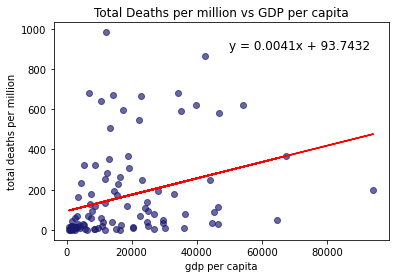

In [7]:
x = RegressCovid["gdp_per_capita"]
y = RegressCovid["total_deaths_per_million"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],4)}")
print(f"The r-squared (goodness of fit) is: {round(rvalue**2,4)}")
print(f"The pvalue of the model is: {round(pvalue,4)}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") 
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(50000,900),fontsize=12,color="black")
plt.title(f"Total Deaths per million vs GDP per capita")
plt.xlabel("gdp per capita")
plt.ylabel("total deaths per million")
plt.savefig("regress1.png")
plt.show()

### Multivariate Models

In [8]:
#Importing two interfaces from statsmodels library specialized in multiple lineal models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
# AVAILABLE VARIABLES SUBJECT TO STUDY
#"population", "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
# "hospital_beds_per_thousand", "life_expectancy", "human_development_index"

In [10]:
# TRIAL #1 THIS ATTEMPT USE A MULTIVARIATE MODEL WITH NO CONSTANT AND ALL THE VARIABLES SUBJECT TO STUDY:
#"population", "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
# "hospital_beds_per_thousand", "life_expectancy", "human_development_index"

X = RegressCovid[["population", "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
                  "hospital_beds_per_thousand", "life_expectancy", "human_development_index"]]   

y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"""
                   {round(coefficients[0],4)} population + {round(coefficients[1],4)} gdp_per_capita + 
                   {round(coefficients[2],4)} extreme_poverty + {round(coefficients[3],4)} cardiovasc_death_rate +
                   {round(coefficients[4],4)} diabetes_prevalence + {round(coefficients[5],4)} hospital_beds_per_thousand +
                   {round(coefficients[6],4)} life_expectancy + {round(coefficients[7],4)} human_development_index
                   """
print(f"The equation model is {equation_model}")

print(results.summary())

The equation model is 
                   -0.0 population + -0.0034 gdp_per_capita + 
                   -1.5964 extreme_poverty + -0.525 cardiovasc_death_rate +
                   -9.6511 diabetes_prevalence + -23.4801 hospital_beds_per_thousand +
                   -2.6241 life_expectancy + 974.8402 human_development_index
                   
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.538
Model:                                  OLS   Adj. R-squared (uncentered):              0.499
Method:                       Least Squares   F-statistic:                              13.83
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    3.86e-13
Time:                              20:37:18   Log-Likelihood:                         -685.53
No. Observations:                       103   AIC:                                      1

In [11]:
# TRIAL #2 THIS ATTEMPT USE A MULTIVARIATE MODEL WITH NO CONSTANT AND ELIMINATING VARIABLES WITH NO 
# STATISTICAL SIGNIFICANCE: "population" & "life_expectancy"

X = RegressCovid[["gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", 
                  "hospital_beds_per_thousand", "human_development_index"]]   

y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"""
                   {round(coefficients[0],4)} gdp_per_capita + {round(coefficients[1],4)} extreme_poverty + 
                   {round(coefficients[2],4)} cardiovasc_death_rate + {round(coefficients[3],4)} diabetes_prevalence +
                   {round(coefficients[4],4)} hospital_beds_per_thousand + {round(coefficients[5],4)} human_development_index
                   """
print(f"The equation model is {equation_model}")

print(results.summary())

The equation model is 
                   -0.0028 gdp_per_capita + -2.1869 extreme_poverty + 
                   -0.5595 cardiovasc_death_rate + -9.963 diabetes_prevalence +
                   -20.5276 hospital_beds_per_thousand + 705.155 human_development_index
                   
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.536
Model:                                  OLS   Adj. R-squared (uncentered):              0.507
Method:                       Least Squares   F-statistic:                              18.68
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    2.47e-14
Time:                              20:37:32   Log-Likelihood:                         -685.76
No. Observations:                       103   AIC:                                      1384.
Df Residuals:                            97   BIC:         

In [12]:
# TRIAL#3 THIS ATTEMPT USE A MULTIVARIATE MODEL WITH NO CONSTANT AND ELIMINATING THE FOLLOWING VARIABLES:
# "gdp_per_capita" & "diabetes_prevalence" AS THE DON'T HAVE SATISTICAL SIGNIFICANCE WITH A CONFIDENCE LEVEL OF 0.05

X = RegressCovid[["extreme_poverty", "cardiovasc_death_rate", "hospital_beds_per_thousand", "human_development_index"]]   

y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"""
                   {round(coefficients[0],4)} extreme_poverty + {round(coefficients[1],4)} cardiovasc_death_rate + 
                   {round(coefficients[2],4)} hospital_beds_per_thousand + {round(coefficients[3],4)} human_development_index
                   """
print(f"The equation model is {equation_model}")

print(results.summary())

The equation model is 
                   -1.4351 extreme_poverty + -0.4854 cardiovasc_death_rate + 
                   -19.1548 hospital_beds_per_thousand + 495.1758 human_development_index
                   
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.520
Model:                                  OLS   Adj. R-squared (uncentered):              0.501
Method:                       Least Squares   F-statistic:                              26.84
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    4.36e-15
Time:                              20:37:43   Log-Likelihood:                         -687.49
No. Observations:                       103   AIC:                                      1383.
Df Residuals:                            99   BIC:                                      1394.
Df Model:                            

In [13]:
# TRIAL#4 THIS ATTEMPT USE A MULTIVARIATE MODEL WITH NO CONSTANT AND ELIMINATING "extreme_poverty" BECAUSE OF ITS
# STATISTICAL SIGNIFICANCE

X = RegressCovid[["cardiovasc_death_rate", "hospital_beds_per_thousand", "human_development_index"]]   

y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"""
                   {round(coefficients[0],4)} cardiovasc_death_rate + {round(coefficients[1],4)} hospital_beds_per_thousand + 
                   {round(coefficients[2],4)} human_development_index
                   """
print(f"The equation model is {equation_model}")


print(results.summary())

The equation model is 
                   -0.5772 cardiovasc_death_rate + -14.2563 hospital_beds_per_thousand + 
                   489.1447 human_development_index
                   
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.513
Model:                                  OLS   Adj. R-squared (uncentered):              0.498
Method:                       Least Squares   F-statistic:                              35.07
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    1.43e-15
Time:                              20:38:05   Log-Likelihood:                         -688.29
No. Observations:                       103   AIC:                                      1383.
Df Residuals:                           100   BIC:                                      1390.
Df Model:                                 3                    

In [14]:
# TRIAL#5 THIS ATTEMPT USE A BIVARIATE MODEL WITH NO CONSTANT AND USING ONLY TWO VARIABLES:
#"cardiovasc_death_rate", "human_development_index"

X = RegressCovid[["cardiovasc_death_rate", "human_development_index"]]   

y = RegressCovid["total_deaths_per_million"]

#This line add a constant (intercept) to the model - if we omit this the model won't have constant
#X = sm.add_constant(X)

# Obtaining the Ordinary Least Squares 
model = sm.OLS(y, X)
# This method retuns the regression results in an object containing estimated model parameters
results = model.fit()

coefficients = results.params
equation_model = f"""
                   {round(coefficients[0],4)} cardiovasc_death_rate + {round(coefficients[1],4)} human_development_index
                   """
print(f"The equation model is {equation_model}")

print(results.summary())

The equation model is 
                   -0.5883 cardiovasc_death_rate + 434.4442 human_development_index
                   
                                    OLS Regression Results                                   
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.503
Model:                                  OLS   Adj. R-squared (uncentered):              0.493
Method:                       Least Squares   F-statistic:                              51.08
Date:                      Thu, 29 Oct 2020   Prob (F-statistic):                    4.71e-16
Time:                              20:38:24   Log-Likelihood:                         -689.32
No. Observations:                       103   AIC:                                      1383.
Df Residuals:                           101   BIC:                                      1388.
Df Model:                                 2                                                  
Covariance Type:           

### This is the same multivariate exercise using excel

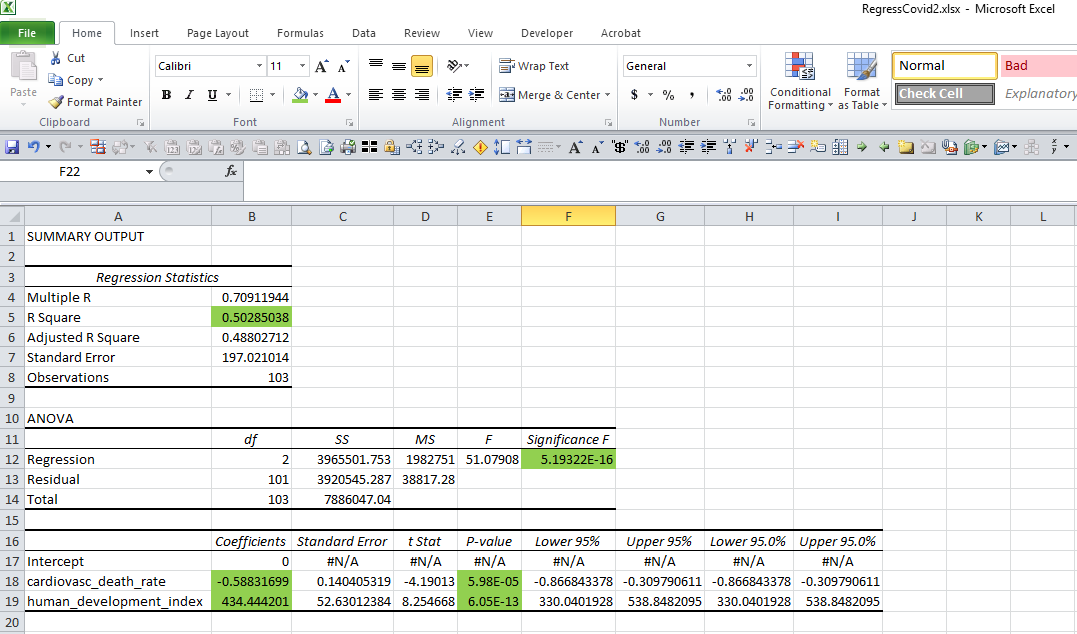

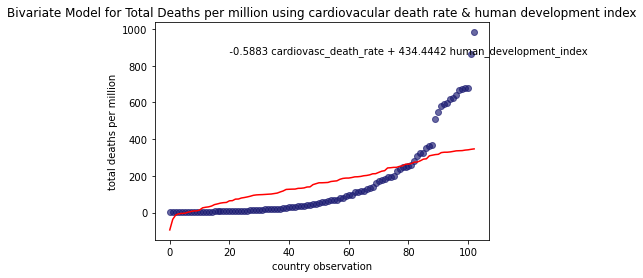

In [15]:
#Plotting the model
x_axis = np.arange(0, len(RegressCovid["iso_code"]), 1)

sorted_y = y.sort_values()

predicted_y = results.predict(X)
predicted_y = predicted_y.sort_values()

plt.scatter(x_axis, sorted_y, alpha = 0.65, color = "midnightblue")
plt.plot(x_axis, predicted_y,"r-") 
plt.annotate(equation_model,(0,800),fontsize=10,color="black")
plt.title(f"Bivariate Model for Total Deaths per million using cardiovacular death rate & human development index")
plt.xlabel("country observation")
plt.ylabel("total deaths per million")
#plt.savefig("bivariate_model.png")
plt.show()